In [1]:
import pandas as pd
from prophet import Prophet
from datetime import datetime, timedelta
from collections import deque
import numpy as np
import math
import time
from neuralprophet import NeuralProphet

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from orbit.utils.simulation import make_trend, make_seasonality, make_regression

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [8, 8]

%matplotlib inline

import pandas as pd
import random
random.seed()

# xs = pd.date_range("00:00", "23:59", freq="1min")
xs = pd.date_range(start='1/1/2018', end='1/1/2021', freq="D")
xs

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', length=1097, freq='D')

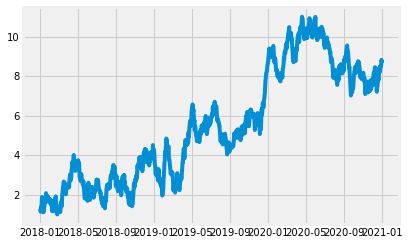

In [2]:
multiplier = 10

rw = make_trend(len(xs), rw_loc=0.01, rw_scale=1, seed=random.randint(1, 2000))
# normalize [0, 1.5]
y= 1 + (multiplier*(rw - np.min(rw))/np.ptp(rw))
_ = plt.plot(xs, y)

# fs = make_seasonality(len(xs), seasonality=random.randint(100, 1000), method='fourier', order=random.randint(4, 10), seed=random.randint(1, 2000))
# y = 1 + (multiplier*(fs - np.min(fs))/np.ptp(fs))
# _ = plt.plot(y)

# arma_trend =  make_trend(len(xs), method='arma', arma=[.8, -.1], seed=random.randint(1, 2000))
# # normalize [0, 1.5]
# y = (multiplier*(arma_trend - np.min(arma_trend))/np.ptp(arma_trend))
# _ = plt.plot(xs, y)

# ds = make_seasonality(len(xs), seasonality=random.randint(20, 50), duration=random.randint(2, 50), method='discrete', seed=random.randint(1, 2000))
# y = (multiplier*(ds - np.min(ds))/np.ptp(ds))
# _ = plt.plot(xs, y)

# y[1000] = 30

df = pd.DataFrame({"ds" : xs, "y" : y})

In [ ]:
## Neural Prophet Trend
max_interval = 1400
total_forecast1 = None
one_step_len = 5
n_loops = (len(df) // one_step_len) - 1
print(n_loops)
for i1 in range(n_loops): # 39 for normal period and 59 for all
    i = i1 * one_step_len
    df_train1, df_val1 = df[0:i+one_step_len].copy(), df[i+one_step_len: i + one_step_len*2].copy().reset_index()
    #df_train1, df_val1 = df[max(0, i + one_step_len - max_interval):i+one_step_len].copy(), df[i+one_step_len: i + one_step_len*2].copy().reset_index()
    m = NeuralProphet(
        n_changepoints=10,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
    )
    train_metrics = m.fit(df_train1, freq="D", )
    future1 = m.make_future_dataframe(df_train1, periods=one_step_len,n_historic_predictions=0)
    future_forecast1 = m.predict(future1)
    future_forecast1['y'] = df_val1['y']
    m.plot(future_forecast1)
    if total_forecast1 is None:
        total_forecast1 = future_forecast1.copy()
    else:
        total_forecast1 = pd.concat([total_forecast1,future_forecast1.copy()])
total_forecast1 = total_forecast1.reset_index()

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 1
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 1000


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-02


218


Epoch[1000/1000]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.85it/s, SmoothL1Loss=1.73e-5, MAE=0.00264, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 1000


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[1000/1000]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 117.51it/s, SmoothL1Loss=0.00204, MAE=0.0451, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 1000


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E+00
Epoch[1000/1000]: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.64it/s, SmoothL1Loss=0.00251, MAE=0.0452, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 800


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E-02
Epoch[800/800]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 800/800 [00:11<00:00, 72.18it/s, SmoothL1Loss=0.00429, MAE=0.074, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 640


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-03
Epoch[640/640]: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 640/640 [00:10<00:00, 62.78it/s, SmoothL1Loss=0.00508, MAE=0.0762, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 533


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E-02
Epoch[533/533]: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 533/533 [00:08<00:00, 59.23it/s, SmoothL1Loss=0.00492, MAE=0.0738, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 457


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[457/457]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 457/457 [00:08<00:00, 52.00it/s, SmoothL1Loss=0.00435, MAE=0.072, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 400


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[400/400]: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:08<00:00, 48.98it/s, SmoothL1Loss=0.00719, MAE=0.0918, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 355


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[355/355]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 355/355 [00:08<00:00, 41.71it/s, SmoothL1Loss=0.0083, MAE=0.0934, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 320


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[320/320]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320/320 [00:08<00:00, 39.47it/s, SmoothL1Loss=0.0111, MAE=0.111, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 290


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-04
Epoch[290/290]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 290/290 [00:08<00:00, 36.23it/s, SmoothL1Loss=0.0242, MAE=0.209, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 266


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-03
Epoch[266/266]: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 266/266 [00:07<00:00, 34.41it/s, SmoothL1Loss=0.015, MAE=0.15, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 246


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-02
Epoch[246/246]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 246/246 [00:07<00:00, 31.66it/s, SmoothL1Loss=0.0106, MAE=0.126, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 228


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-03
Epoch[228/228]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 228/228 [00:07<00:00, 31.30it/s, SmoothL1Loss=0.0171, MAE=0.167, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 213


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-02
Epoch[213/213]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 213/213 [00:07<00:00, 29.09it/s, SmoothL1Loss=0.0121, MAE=0.133, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 200


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[200/200]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 27.44it/s, SmoothL1Loss=0.00721, MAE=0.152, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 188


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E+00
Epoch[188/188]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:07<00:00, 26.68it/s, SmoothL1Loss=0.00868, MAE=0.172, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 177


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E+00
Epoch[177/177]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 177/177 [00:07<00:00, 25.07it/s, SmoothL1Loss=0.00889, MAE=0.181, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 2
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 168


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[168/168]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:06<00:00, 24.02it/s, SmoothL1Loss=0.00697, MAE=0.163, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 320


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-01
Epoch[320/320]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320/320 [00:05<00:00, 59.36it/s, SmoothL1Loss=0.00472, MAE=0.154, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 304


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E+00
Epoch[304/304]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 304/304 [00:05<00:00, 56.52it/s, SmoothL1Loss=0.00546, MAE=0.181, RegLoss=0]
/Users/tybalex/.pyenv/versions/3.8.6/envs/py38/lib/python3.8/site-packages/neuralprophet/plot_forecast.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor="w", figsize=figsize)
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 290


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[290/290]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 290/290 [00:05<00:00, 55.32it/s, SmoothL1Loss=0.00349, MAE=0.165, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 278


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[278/278]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [00:05<00:00, 53.53it/s, SmoothL1Loss=0.00255, MAE=0.167, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 266


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[266/266]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 266/266 [00:05<00:00, 52.17it/s, SmoothL1Loss=0.00312, MAE=0.192, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 256


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-02
Epoch[256/256]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:05<00:00, 49.72it/s, SmoothL1Loss=0.00293, MAE=0.188, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 246


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[246/246]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 246/246 [00:05<00:00, 47.37it/s, SmoothL1Loss=0.00362, MAE=0.204, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 237


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E+00
Epoch[237/237]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 237/237 [00:05<00:00, 46.53it/s, SmoothL1Loss=0.00375, MAE=0.211, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 228


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E+00
Epoch[228/228]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 228/228 [00:05<00:00, 45.50it/s, SmoothL1Loss=0.00318, MAE=0.195, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 220


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E-01
Epoch[220/220]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 220/220 [00:05<00:00, 43.80it/s, SmoothL1Loss=0.0025, MAE=0.168, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 213


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-02
Epoch[213/213]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 213/213 [00:04<00:00, 43.30it/s, SmoothL1Loss=0.00276, MAE=0.184, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 206


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[206/206]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 206/206 [00:04<00:00, 41.62it/s, SmoothL1Loss=0.00303, MAE=0.186, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 200


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[200/200]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:04<00:00, 41.67it/s, SmoothL1Loss=0.00306, MAE=0.189, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 193


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E+00
Epoch[193/193]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 193/193 [00:04<00:00, 40.47it/s, SmoothL1Loss=0.00344, MAE=0.202, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 188


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[188/188]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:04<00:00, 38.08it/s, SmoothL1Loss=0.00351, MAE=0.201, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 182


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[182/182]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 182/182 [00:04<00:00, 38.77it/s, SmoothL1Loss=0.00335, MAE=0.193, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 177


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[177/177]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 177/177 [00:04<00:00, 37.30it/s, SmoothL1Loss=0.00346, MAE=0.2, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 172


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[172/172]: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 172/172 [00:04<00:00, 36.22it/s, SmoothL1Loss=0.004, MAE=0.22, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 168


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E+00
Epoch[168/168]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:04<00:00, 35.43it/s, SmoothL1Loss=0.0035, MAE=0.208, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 164


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E+00
Epoch[164/164]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 164/164 [00:04<00:00, 35.06it/s, SmoothL1Loss=0.00374, MAE=0.208, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 160


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[160/160]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:04<00:00, 35.08it/s, SmoothL1Loss=0.00399, MAE=0.208, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 156


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[156/156]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 156/156 [00:04<00:00, 33.97it/s, SmoothL1Loss=0.00416, MAE=0.212, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 152


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E+00
Epoch[152/152]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 152/152 [00:04<00:00, 32.41it/s, SmoothL1Loss=0.00439, MAE=0.221, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 148


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[148/148]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 148/148 [00:04<00:00, 32.53it/s, SmoothL1Loss=0.00449, MAE=0.221, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 145


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E-01
Epoch[145/145]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [00:04<00:00, 31.80it/s, SmoothL1Loss=0.00484, MAE=0.231, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 142


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[142/142]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 142/142 [00:04<00:00, 31.10it/s, SmoothL1Loss=0.00549, MAE=0.246, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 139


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[139/139]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 139/139 [00:04<00:00, 31.22it/s, SmoothL1Loss=0.00603, MAE=0.252, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 136


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[136/136]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 136/136 [00:04<00:00, 30.19it/s, SmoothL1Loss=0.00678, MAE=0.265, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 133


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E+00
Epoch[133/133]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:04<00:00, 30.40it/s, SmoothL1Loss=0.00672, MAE=0.269, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 130


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[130/130]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 130/130 [00:04<00:00, 28.51it/s, SmoothL1Loss=0.00675, MAE=0.269, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 128


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E+00
Epoch[128/128]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 128/128 [00:04<00:00, 28.47it/s, SmoothL1Loss=0.00711, MAE=0.276, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 125


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E+00
Epoch[125/125]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:04<00:00, 28.38it/s, SmoothL1Loss=0.00689, MAE=0.27, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 123


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[123/123]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 123/123 [00:04<00:00, 28.12it/s, SmoothL1Loss=0.00735, MAE=0.281, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 120


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[120/120]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:04<00:00, 27.21it/s, SmoothL1Loss=0.00706, MAE=0.273, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 118


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E+00
Epoch[118/118]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:04<00:00, 26.52it/s, SmoothL1Loss=0.00711, MAE=0.274, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 116


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E+00
Epoch[116/116]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 116/116 [00:04<00:00, 26.14it/s, SmoothL1Loss=0.00691, MAE=0.271, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 114


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-02
Epoch[114/114]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114/114 [00:04<00:00, 25.51it/s, SmoothL1Loss=0.00683, MAE=0.266, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 112


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-04
Epoch[112/112]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:04<00:00, 25.78it/s, SmoothL1Loss=0.0204, MAE=0.463, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 110


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-03
Epoch[110/110]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:04<00:00, 25.36it/s, SmoothL1Loss=0.0103, MAE=0.33, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 108


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[108/108]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 108/108 [00:04<00:00, 25.52it/s, SmoothL1Loss=0.00833, MAE=0.293, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 106


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E+00
Epoch[106/106]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:04<00:00, 24.83it/s, SmoothL1Loss=0.00776, MAE=0.288, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 104


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[104/104]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104/104 [00:04<00:00, 24.82it/s, SmoothL1Loss=0.00725, MAE=0.269, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 103


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[103/103]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 103/103 [00:04<00:00, 24.28it/s, SmoothL1Loss=0.0075, MAE=0.272, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 101


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[101/101]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:04<00:00, 22.14it/s, SmoothL1Loss=0.00803, MAE=0.288, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 100


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[100/100]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 20.30it/s, SmoothL1Loss=0.0104, MAE=0.328, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 98


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E+00
Epoch[98/98]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:04<00:00, 20.67it/s, SmoothL1Loss=0.0113, MAE=0.355, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 96


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[96/96]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:05<00:00, 18.08it/s, SmoothL1Loss=0.0113, MAE=0.359, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 95


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E+00
Epoch[95/95]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 95/95 [00:04<00:00, 20.52it/s, SmoothL1Loss=0.0113, MAE=0.362, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 94


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[94/94]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:05<00:00, 16.04it/s, SmoothL1Loss=0.0105, MAE=0.36, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 92


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E+00
Epoch[92/92]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [00:04<00:00, 20.51it/s, SmoothL1Loss=0.00989, MAE=0.359, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 91


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E+00
Epoch[91/91]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 91/91 [00:04<00:00, 19.49it/s, SmoothL1Loss=0.00901, MAE=0.348, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 90


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-03
Epoch[90/90]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:04<00:00, 19.83it/s, SmoothL1Loss=0.0123, MAE=0.409, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 88


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E+00
Epoch[88/88]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 88/88 [00:04<00:00, 20.12it/s, SmoothL1Loss=0.00802, MAE=0.336, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 87


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[87/87]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87/87 [00:04<00:00, 19.30it/s, SmoothL1Loss=0.0064, MAE=0.304, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 86


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[86/86]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86/86 [00:04<00:00, 19.30it/s, SmoothL1Loss=0.00678, MAE=0.316, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 85


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[85/85]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 85/85 [00:04<00:00, 19.20it/s, SmoothL1Loss=0.0076, MAE=0.334, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 84


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[84/84]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84/84 [00:04<00:00, 18.86it/s, SmoothL1Loss=0.00828, MAE=0.348, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 83


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E+00
Epoch[83/83]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:04<00:00, 19.31it/s, SmoothL1Loss=0.00973, MAE=0.382, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 82


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E+00
Epoch[82/82]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 82/82 [00:04<00:00, 19.00it/s, SmoothL1Loss=0.0104, MAE=0.391, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 81


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E+00
Epoch[81/81]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:04<00:00, 18.01it/s, SmoothL1Loss=0.0115, MAE=0.404, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 80


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[80/80]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:04<00:00, 18.28it/s, SmoothL1Loss=0.0116, MAE=0.407, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 79


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-04
Epoch[79/79]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:04<00:00, 17.79it/s, SmoothL1Loss=0.0169, MAE=0.519, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 78


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-02
Epoch[78/78]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 78/78 [00:04<00:00, 17.72it/s, SmoothL1Loss=0.0107, MAE=0.411, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 77


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[77/77]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:04<00:00, 18.01it/s, SmoothL1Loss=0.0108, MAE=0.42, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 76


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[76/76]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 76/76 [00:04<00:00, 17.65it/s, SmoothL1Loss=0.0104, MAE=0.412, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 75


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[75/75]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75/75 [00:04<00:00, 17.31it/s, SmoothL1Loss=0.0101, MAE=0.407, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 74


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[74/74]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:04<00:00, 17.48it/s, SmoothL1Loss=0.00942, MAE=0.392, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 73


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[73/73]: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:04<00:00, 17.22it/s, SmoothL1Loss=0.0102, MAE=0.4, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 72


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E+00
Epoch[72/72]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:04<00:00, 16.56it/s, SmoothL1Loss=0.00909, MAE=0.375, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 71


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[71/71]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:04<00:00, 16.76it/s, SmoothL1Loss=0.00941, MAE=0.381, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 71


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E-01
Epoch[71/71]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:04<00:00, 17.52it/s, SmoothL1Loss=0.00816, MAE=0.353, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 70


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[70/70]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:03<00:00, 17.86it/s, SmoothL1Loss=0.00926, MAE=0.376, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 69


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[69/69]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:04<00:00, 17.24it/s, SmoothL1Loss=0.00951, MAE=0.385, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 68


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E+00
Epoch[68/68]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:04<00:00, 16.43it/s, SmoothL1Loss=0.0106, MAE=0.413, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 68


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-03
Epoch[68/68]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 68/68 [00:03<00:00, 17.31it/s, SmoothL1Loss=0.013, MAE=0.472, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 67


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[67/67]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 67/67 [00:04<00:00, 16.51it/s, SmoothL1Loss=0.0116, MAE=0.45, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 66


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[66/66]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:03<00:00, 16.62it/s, SmoothL1Loss=0.0121, MAE=0.475, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 65


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[65/65]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:04<00:00, 15.63it/s, SmoothL1Loss=0.0123, MAE=0.478, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 65


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E+00
Epoch[65/65]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:04<00:00, 15.78it/s, SmoothL1Loss=0.0142, MAE=0.51, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 64


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E-02
Epoch[64/64]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:04<00:00, 15.42it/s, SmoothL1Loss=0.0151, MAE=0.533, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 64


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[64/64]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 64/64 [00:03<00:00, 16.33it/s, SmoothL1Loss=0.0135, MAE=0.515, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 63


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[63/63]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:04<00:00, 15.16it/s, SmoothL1Loss=0.012, MAE=0.491, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 62


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[62/62]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:04<00:00, 15.08it/s, SmoothL1Loss=0.0102, MAE=0.471, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 62


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[62/62]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:04<00:00, 13.65it/s, SmoothL1Loss=0.0093, MAE=0.451, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 61


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E+00
Epoch[61/61]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 61/61 [00:04<00:00, 12.71it/s, SmoothL1Loss=0.00937, MAE=0.474, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 60


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[60/60]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:05<00:00, 11.64it/s, SmoothL1Loss=0.00836, MAE=0.455, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 60


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[60/60]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:04<00:00, 13.18it/s, SmoothL1Loss=0.00767, MAE=0.445, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 59


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E+00
Epoch[59/59]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:05<00:00, 11.48it/s, SmoothL1Loss=0.00752, MAE=0.45, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 59


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[59/59]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:04<00:00, 14.29it/s, SmoothL1Loss=0.00665, MAE=0.432, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 58


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E+00
Epoch[58/58]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:04<00:00, 13.97it/s, SmoothL1Loss=0.00689, MAE=0.455, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 58


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E-01
Epoch[58/58]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:04<00:00, 13.87it/s, SmoothL1Loss=0.00595, MAE=0.425, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 57


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E+00
Epoch[57/57]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:04<00:00, 13.98it/s, SmoothL1Loss=0.00609, MAE=0.443, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 57


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[57/57]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 57/57 [00:04<00:00, 14.03it/s, SmoothL1Loss=0.00554, MAE=0.431, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 56


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E+00
Epoch[56/56]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:04<00:00, 12.54it/s, SmoothL1Loss=0.00552, MAE=0.443, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 56


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E-01
Epoch[56/56]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:04<00:00, 11.77it/s, SmoothL1Loss=0.00501, MAE=0.424, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 55


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[55/55]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:04<00:00, 13.52it/s, SmoothL1Loss=0.00507, MAE=0.432, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 55


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[55/55]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 55/55 [00:04<00:00, 13.52it/s, SmoothL1Loss=0.00542, MAE=0.449, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 54


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[54/54]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:04<00:00, 13.42it/s, SmoothL1Loss=0.00584, MAE=0.465, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 54


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[54/54]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [00:03<00:00, 13.51it/s, SmoothL1Loss=0.00632, MAE=0.492, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 53


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[53/53]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53/53 [00:04<00:00, 13.10it/s, SmoothL1Loss=0.00658, MAE=0.505, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 53


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[53/53]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53/53 [00:04<00:00, 10.88it/s, SmoothL1Loss=0.00724, MAE=0.533, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 52


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[52/52]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:04<00:00, 11.78it/s, SmoothL1Loss=0.00785, MAE=0.556, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 52


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[52/52]: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:04<00:00, 11.66it/s, SmoothL1Loss=0.008, MAE=0.563, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 52


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[52/52]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:04<00:00, 10.56it/s, SmoothL1Loss=0.00818, MAE=0.572, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 51


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[51/51]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:04<00:00, 12.27it/s, SmoothL1Loss=0.00847, MAE=0.587, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 51


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[51/51]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [00:04<00:00, 12.22it/s, SmoothL1Loss=0.00811, MAE=0.572, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 50


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[50/50]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.44it/s, SmoothL1Loss=0.00762, MAE=0.55, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 50


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[50/50]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.72it/s, SmoothL1Loss=0.00715, MAE=0.526, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 50


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[50/50]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 12.30it/s, SmoothL1Loss=0.00667, MAE=0.507, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 49


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[49/49]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:04<00:00, 12.17it/s, SmoothL1Loss=0.00635, MAE=0.495, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 49


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.31E+00
Epoch[49/49]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:04<00:00, 10.76it/s, SmoothL1Loss=0.0061, MAE=0.486, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 48


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[48/48]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 12.86it/s, SmoothL1Loss=0.00542, MAE=0.458, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 48


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E+00
Epoch[48/48]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:04<00:00, 10.80it/s, SmoothL1Loss=0.00489, MAE=0.439, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 48


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-01
Epoch[48/48]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 48/48 [00:03<00:00, 12.53it/s, SmoothL1Loss=0.00433, MAE=0.419, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 47


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[47/47]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:04<00:00,  9.45it/s, SmoothL1Loss=0.00441, MAE=0.426, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 47


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E+00
Epoch[47/47]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:04<00:00, 11.54it/s, SmoothL1Loss=0.00456, MAE=0.445, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 47


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
Epoch[47/47]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:03<00:00, 12.69it/s, SmoothL1Loss=0.00461, MAE=0.452, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 46


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E+00
Epoch[46/46]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:03<00:00, 12.75it/s, SmoothL1Loss=0.00532, MAE=0.49, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 46


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[46/46]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:03<00:00, 12.55it/s, SmoothL1Loss=0.00503, MAE=0.478, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 46


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E+00
Epoch[46/46]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:03<00:00, 12.61it/s, SmoothL1Loss=0.00534, MAE=0.494, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 45


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[45/45]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:03<00:00, 12.25it/s, SmoothL1Loss=0.00527, MAE=0.492, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 45


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 8.11E-01
Epoch[45/45]: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:03<00:00, 12.21it/s, SmoothL1Loss=0.0055, MAE=0.501, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 45


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E-01
Epoch[45/45]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:03<00:00, 12.24it/s, SmoothL1Loss=0.00534, MAE=0.491, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 44


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[44/44]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:03<00:00, 12.09it/s, SmoothL1Loss=0.00548, MAE=0.501, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 44


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[44/44]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:03<00:00, 12.16it/s, SmoothL1Loss=0.00529, MAE=0.495, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 44


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E+00
Epoch[44/44]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44/44 [00:03<00:00, 11.20it/s, SmoothL1Loss=0.00564, MAE=0.515, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 43


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E+00
Epoch[43/43]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:03<00:00, 11.03it/s, SmoothL1Loss=0.00593, MAE=0.527, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 43


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.23E+00
Epoch[43/43]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:03<00:00, 11.44it/s, SmoothL1Loss=0.00635, MAE=0.543, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 43


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.87E+00
Epoch[43/43]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:03<00:00, 11.91it/s, SmoothL1Loss=0.00675, MAE=0.568, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 42


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E+00
Epoch[42/42]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 11.70it/s, SmoothL1Loss=0.00681, MAE=0.576, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 42


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[42/42]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 11.28it/s, SmoothL1Loss=0.00678, MAE=0.582, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 42


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 6.58E-01
Epoch[42/42]: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 11.51it/s, SmoothL1Loss=0.00681, MAE=0.594, RegLoss=0]
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 42


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.00E+00
Epoch[8/42]:  17%|████████████████████████▌                                                                                                                          | 7/42 [00:00<00:03, 11.30it/s, SmoothL1Loss=0.015, MAE=0.873, RegLoss=0]

In [ ]:
p = m.plot(total_forecast1)

In [ ]:
## Neural Prophet AR-Net
max_interval =1400
total_forecast2 = None
one_step_len = 5
n_loops = (len(df) // one_step_len) - 1
print(n_loops)

for i1 in range(10, n_loops): # 39 for normal period and 59 for all
    i = i1 * one_step_len
    df_train1, df_val1 = df[0:i+one_step_len].copy(), df[i+one_step_len: i + one_step_len*2].copy()
    n_lags = min(max_interval ,len(df_train1)-one_step_len)
    m = NeuralProphet(
        n_forecasts=one_step_len,
        n_lags = n_lags,
        num_hidden_layers=2,
        ar_sparsity=0.05,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False
    )
    train_metrics = m.fit(df_train1, freq="1MIN", )
    future2 = m.make_future_dataframe(df_train1, periods=one_step_len,n_historic_predictions=0)
    future_forecast2 = m.predict(future2)
    future_forecast2 = future_forecast2[n_lags: n_lags + one_step_len].copy()
    future_forecast2['y'] = list(df_val1['y'])
    print(future_forecast2)
    if total_forecast2 is None:
        total_forecast2 = future_forecast2.copy()
    else:
        total_forecast2 = pd.concat([total_forecast2,future_forecast2.copy()])
total_forecast2 = total_forecast2.reset_index()

In [ ]:
total_forecast3 = total_forecast2.copy()
total_forecast3['yhat'] = 0
total_forecast3 = total_forecast3.fillna(value=0)
for j in range(1, one_step_len+1):
    total_forecast3['yhat'] =  total_forecast3['yhat'] + total_forecast3['yhat' + str(j)]
total_forecast3 = total_forecast3[['ds', 'y' , 'yhat']]
total_forecast3.rename(columns = {'yhat':'yhat1'}, inplace = True)

total_forecast3 = total_forecast3.reset_index()
p = m.plot(total_forecast3)

In [ ]:
total_forecast3